In [4]:
#Import libraries
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt
%matplotlib inline

import yake

In [3]:
import requests
import boilerpy3
from boilerpy3 import extractors
import re

import spacy
nlp = spacy.load("en_core_web_lg")

In [5]:
extractor = extractors.ArticleExtractor()

In [6]:
url = 'https://www.cnn.com/2021/09/20/politics/border-patrol-haitian-immigrants-viral-video/index.html'

In [239]:
yakeo = yake.KeywordExtractor()

In [240]:
doc = extractor.get_doc_from_url(url)

In [241]:
def yake_kws(inputDoc):
    
    return [hit[0] for hit in yakeo.extract_keywords(doc.content)]

In [242]:
def SpaCy_Ents(inputText):
    nlpdoc = nlp(inputText)
    keeplist = ['GPE', 'LOC', 'ORG', 'PERSON', 'PRODUCT', 'NORP', 'FAC', 'LAW']

    outlist = []
    for thing in nlpdoc.ents:
        if thing.label_ in keeplist:
            outlist.append(str(thing))
    outlist = list(set(outlist))
    return outlist

In [243]:
s1 = SpaCy_Ents(doc.content)

In [244]:
s1

['Psaki',
 'Getty Images',
 'Mexico',
 'Mayorkas',
 'Office of Professional Responsibility',
 'the Office of Professional Responsibility',
 "Joe Biden's",
 'John Holman',
 'Al Jazeera',
 'English',
 'DHS',
 'Haitians',
 'United States Border Patrol',
 'Biden',
 'Acosta',
 'CNN',
 'US Customs',
 'Border Patrol',
 'US',
 'Haitian',
 'the Del Rio International Bridge',
 'Washington',
 'Texas',
 'The United States',
 "Border Protection's",
 'Department',
 'US Border Patrol',
 'Alejandro Mayorkas',
 'PAUL RATJE / AFP',
 'B]ut',
 'Paul Murphy',
 'Jen Psaki',
 'Twitter',
 'Reuters',
 'the Rio Grande',
 'Del Rio',
 'South America',
 'Haiti',
 'Ortiz',
 'Jovenel Moise',
 'the White House',
 'White House',
 'the Acuna Del Rio International Bridge',
 'PAUL RATJE',
 'Democratic',
 'Raul Ortiz']

In [245]:
y1 = yake_kws(doc.content)

In [246]:
y1

['Del Rio',
 'Acosta presses DHS',
 'Border Patrol',
 'Del Rio International',
 'Border Patrol agents',
 'Border',
 'migrants',
 'Rio International Bridge',
 'White House press',
 'Acosta presses',
 'White House',
 'Acuna Del Rio',
 'Rio',
 'States Border Patrol',
 'secretary Jen Psaki',
 'Border Patrol Chief',
 'Patrol',
 'Del',
 'presses DHS secretary',
 'Rio Grande']

In [247]:
res = len(set(s1) & set(y1)) / float(len(set(s1) | set(y1))) * 100
res

4.761904761904762

In [248]:
overlap = [deal for deal in y1 if deal in s1]
overlap

['Del Rio', 'Border Patrol', 'White House']

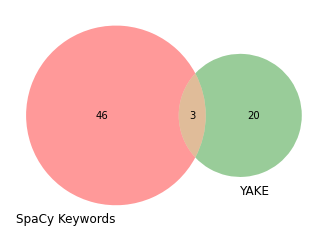

In [249]:
venn2(subsets = (len(s1), len(y1), len(overlap)), set_labels = ('SpaCy Keywords', 'YAKE'))